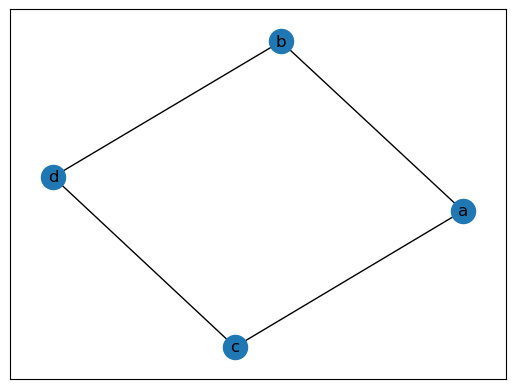

BFS:
a->b->c->d->
DFS:
a->b->d->c->
DLS:
a->b->d->
IDS:

Till depth 0:
a->
Till depth 1:
a->b->c->
Till depth 2:
a->b->d->

Goal state reached at Depth 2


In [1]:
import networkx as nx
import matplotlib.pyplot as plt
graph={
    'a':['b','c'],
    'b':['d'],
    'c':['d'],
    'd':[]
}
g1=nx.Graph()
for i in graph.keys():
    for j in range(len(graph[i])):
        g1.add_edge(i,graph[i][j])
nx.draw_networkx(g1)
#nx.draw(g1, with_labels = True)
plt.show()
source,goal='a','d'
def bfs(graph,source):
    queue,visited=[],[]
    queue.append(source)
    visited.append(source)
    while queue:
        res=queue.pop(0)
        print(res,end='->')
        for i in graph[res]:
            if i not in visited:
                queue.append(i)
                visited.append(i)
def dfs(graph,source):
    if source not in visitedD:
            print(source,end="->")
            visitedD.append(source)
            for i in graph[source]:
                dfs(graph,i)
def dls(exp,graph,source,goal,limit):
    if source==goal:
        print(source,end='->')
        return True
    if source not in exp:
        print(source,end='->')
        if limit>0:
            flag=False
            for i in graph[source]:
                if dls(exp,graph,i,goal,limit-1):
                    flag=True
                    break
            return flag
    return False
def depthsearch(exp,graph,source,goal,limit):
    if dls(exp,graph,source,goal,limit)==False:
        print("Goal not found")
def ids(exp,graph,source,goal,limit):
    for l in range(limit + 1):
        exp.clear()
        print("\nTill depth " + str(l) + ":")
        if dls(exp,graph,source,goal,l):
            print("\n\nGoal state reached at Depth " + str(l))
            return
print("BFS:")
bfs(graph,source)
visitedD=[]
print("\nDFS:")
dfs(graph,source)
exp=set()
print("\nDLS:")
depthsearch(exp,graph,source,goal,2)
print("\nIDS:")
ids(exp,graph,source,goal,4)
    

{('a', 'b'): Text(0.23007237668993175, 0.01987680514649415, '1'),
 ('a', 'c'): Text(-0.3004112525594044, -0.050309489696202345, '4'),
 ('b', 'd'): Text(0.677534219825791, 0.19659389091212925, '3'),
 ('b', 'e'): Text(0.7447684030027169, -0.048702184329142924, '2'),
 ('c', 'f'): Text(-0.5788038165715255, -0.182788457231267, '5'),
 ('c', 'g'): Text(-0.7436980377758793, 0.0392644732937853, '1')}

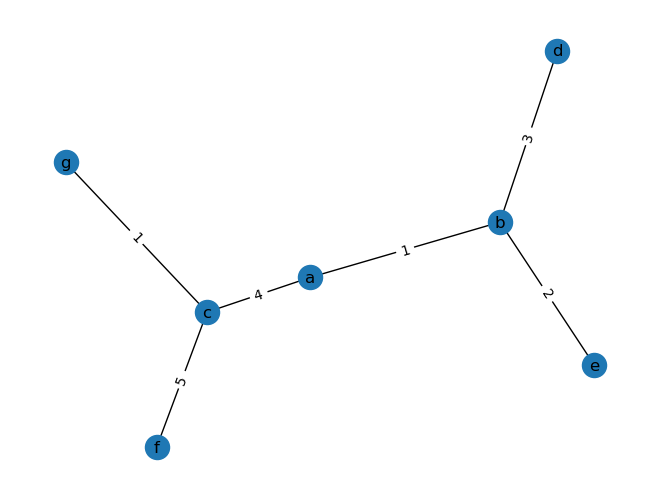

In [62]:
import networkx as nx
graph = {
    'a': [('b', 1), ('c', 4)],
    'b': [('d', 3), ('e', 2)],
    'c': [('f', 5), ('g', 1)],
    'd': [],
    'e': [],
    'f': [],
    'g': []
}
g2=nx.Graph()
for i in graph.keys():
    for j,x in graph[i]:
        g2.add_edge(i,j,weight=x)
pos=nx.spring_layout(g2)
nx.draw(g2,pos,with_labels=True)
labels=nx.get_edge_attributes(g2,'weight')
nx.draw_networkx_edge_labels(g2,pos,edge_labels=labels)

In [65]:
graph = {
    'a': [('b', 1), ('c', 4)],
    'b': [('d', 3), ('e', 2)],
    'c': [('f', 5), ('g', 1)],
    'd': [],
    'e': [],
    'f': [],
    'g': []
}
source,goal='a','g'
expl=[]
def ucs(expl,graph,source,goal):
    frontier=[(0,source)]
    while frontier:
        frontier.sort()
        cost,state=frontier.pop(0)
        if state not in expl:
            expl.append(state)
            print(state,end='->')
            if state==goal:
                return True
            for i,j in graph[state]:
                frontier.append((cost+j,i))
    return False
print("UCS: ")
ucs(expl,graph,source, goal)

UCS: 
a->b->e->c->d->g->

In [4]:
graph = {
    'a': [('b', 75), ('c', 118), ('e', 100)],
    'e': [('g', 80), ('f', 90)],
    'g': [('h', 97)],
    'f': [('i', 211)],
    'h': [('i', 101)]
}

hue = {
    'a': 366, 'b': 374, 'c': 329, 'd': 244,
    'e': 253, 'f': 178, 'g': 193, 'h': 98, 'i': 0
}

source, goal = 'a', 'i'

def gbfs(graph, hue, source, goal, path_cost=0):
    if source == goal:
        return [source], path_cost
    t = {}
    for adj in graph[source]:
        v = adj[0]
        t[v] = hue[v]
    x = min(t.values())
    res = [key for key in t if t[key] == x]
    var = res[0]
    next_path, next_cost= gbfs(graph, hue, var, goal, path_cost + x)
    path = [source] + next_path
    return path, next_cost

def astar(graph,hue,source,goal,cost=0):
    if source == goal:
        return [source], cost
    t = {}
    for adj in graph[source]:
        v = adj[0]
        t[v] = hue[v]+adj[1]
    x = min(t.values())
    res = [key for key in t if t[key] == x]
    var = res[0]
    next_path, next_cost= astar(graph, hue, var, goal,cost + x)
    path = [source] + next_path
    return path, next_cost
path, cost = gbfs(graph, hue, source, goal)
print("GBFS Path:")
for i in path:
    print(i,"->",end=" ")
print("\nPath Cost:", cost)
path2,cost2=astar(graph,hue,source,goal)
print("AStar Path:")
for i in path2:
    print(i,"->",end=" ")

GBFS Path:
a -> e -> f -> i -> 
Path Cost: 431
AStar Path:
a -> e -> f -> i -> 

In [28]:
import math
import random

def fcost(s):
    return sum([x**2 for x in s])
def succ(s,step=1.0):
    return [x+random.uniform(-step,step) for x in s]
def simanneal(initsol,inittemp,alpha,iters):
    cursol=initsol
    cost=fcost(cursol)
    sol=cursol
    mincost=cost
    temp=inittemp
    
    for _ in range(iters):
        n=succ(cursol)
        ncost=fcost(n)
        
        diff=ncost-cost
        if diff<0 or random.random()<math.exp(-diff/temp):
            cursol=n
            cost=ncost
            
            if cost<mincost:
                sol=cursol
                mincost=cost
        temp*=alpha
    return sol,mincost
initsol=[300.0,400.0]
inittemp=1000.0
alpha=0.95
iters=500

best_sol,best_cost=simanneal(initsol,inittemp,alpha,iters)
print("Best Solution:",best_sol)
print("Best Cost:",best_cost)

Best Solution: [240.5323889274672, 294.2838430215433]
Best Cost: 144458.8103866827


In [1]:
import random

def mutate(board1,board2):
    b1,b2=list(board1),list(board2)
    x,y=random.randint(0,7),random.randint(0,7)
    b1[x],b2[x]=b2[x],b1[x]
    b1[y]=str(int(y)+1)
    return (''.join(b1),''.join(b2))

def crossover(board1,board2):
    b1,b2=list(board1),list(board2)
    x=random.randint(0,7)
    b1[:x],b2[:x]=b2[:x],b1[:x]
    return (''.join(b1),''.join(b2))

def fitness(board):
    attacks=0
    for i in range(8):
        for j in range(i+1,8):
            if board[i]==board[j] or abs(int(board[i])-int(board[j]))==j-i:
                attacks+=1
    return attacks

def geneticAlgo(gen,popln):
    i,pq=0,[]
    pq.append((fitness(popln[0]),popln[0]))
    pq.append((fitness(popln[1]),popln[1]))
    while i<gen:
        f1,b1=pq.pop(0)
        f2,b2=pq.pop(0)
        pq.clear()
        if f1==0 :
            print(b1,"in",i+1)
            return
        if f2==0:
            print(b2,"in",i+1)
            return
        x1,x2=crossover(b1,b2)
        x3,x4=crossover(b2,b1)
        newpopln=[(x1,x2),(x3,x4),mutate(x1,x2),mutate(x3,x4)]
        
        for j in newpopln:
            pq.append((fitness(j[0]),j[0]))
            pq.append((fitness(j[1]),j[1]))
        pq.append((f1,b1))
        pq.append((f2,b2))
        
        pq.sort(key=lambda x:x[0])
        i+=1
    print("evolved state:\n",pq[0][1],"in gen",i,"with attacks",pq[0][0])
            
    
    
geneticAlgo(1000, ["32752411", "24748552"])

geneticAlgo(1000, ["17581234", "56782463"])

evolved state:
 24748551 in gen 1000 with attacks 2
17582463 in 3
